<a href="https://colab.research.google.com/github/Pawantripathi2606/diwali_sales_analysis/blob/main/diwali_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data analysis on diwali sales ---

##objective -- improve customer experience by analyzing sales idea and increase revenue

In [4]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
df=pd.read_csv(r"/content/drive/MyDrive/gooogle colab datasets/Diwali Sales Data.csv", encoding='latin1')

## basic cleaning -

In [11]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
df.shape

(11251, 15)

In [15]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [17]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [19]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [21]:
df.shape

(11251, 13)

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(11239, 13)

In [25]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [26]:
# to change data type because the not null values also contain float data  type and rest all contain integer type

df['Amount']=df['Amount'].astype('int')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [28]:
df['Amount'].dtypes

dtype('int64')

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [31]:
#rename
df.rename(columns={'Gender':'sex'},inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   sex               11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [34]:
#describe() method returns description of the data in the dataframe { ex : count , min , max etc}


df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [35]:
# use decribe() in specific columns
df[['Age'  , 'Orders' , 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [36]:
# checking no of rows in dataset
print(df.shape)

(11239, 13)


In [38]:
# checking duplicated rows
df.duplicated().sum()


np.int64(8)

In [39]:
df[df.duplicated()]



,User_ID,Cust_name,Product_ID,sex,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304


## hence there is no need to drop dublicated values there as no such large numbers of same .

# now we do EDA

# sex(gender)

In [40]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='sex', ylabel='count'>

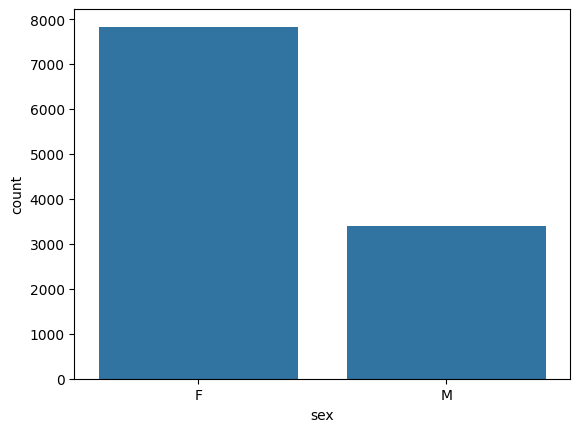

In [41]:
sns.countplot(x='sex',data=df)

/tmp/ipython-input-3362441454.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender= sns.countplot(x='sex',data=df, palette={'M': 'blue', 'F': 'pink'})


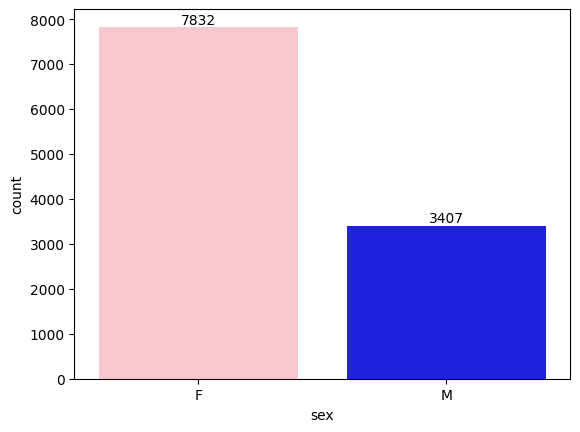

In [46]:
gender= sns.countplot(x='sex',data=df, palette={'M': 'blue', 'F': 'pink'})
for bars in gender.containers:
  gender.bar_label(bars)

plt.show()

## this will show that how much amount has been invested by both genders

In [47]:
df.groupby(['sex'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,sex,Amount
0,F,74335853
1,M,31913276


from matplotlib import pyplot as plt
_df_0['Amount'].plot(kind='hist', bins=20, title='Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Amount'].plot(kind='line', figsize=(8, 4), title='Amount')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Amount', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-1850606588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='Amount',data=sales_gen,palette={'M': 'blue', 'F': 'pink'})


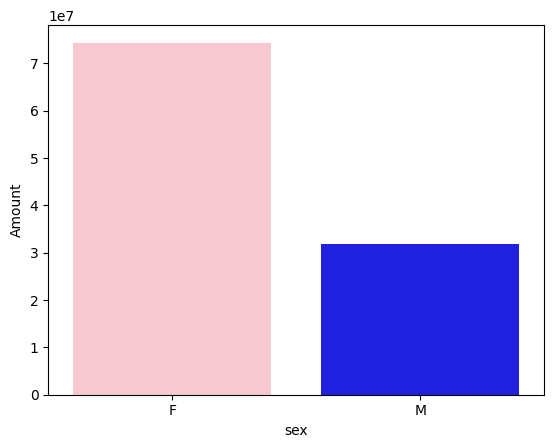

In [51]:
sales_gen=df.groupby(['sex'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='sex',y='Amount',data=sales_gen,palette={'M': 'blue', 'F': 'pink'})
plt.show()

**most of the buyers are females or even purchasing power is high in female**

#age

In [52]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [58]:
#age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
#sns.barplot(x='Age Group',y='Amount',data=age,palette='rainbow')
#plt.show()

<Axes: xlabel='Age Group', ylabel='count'>

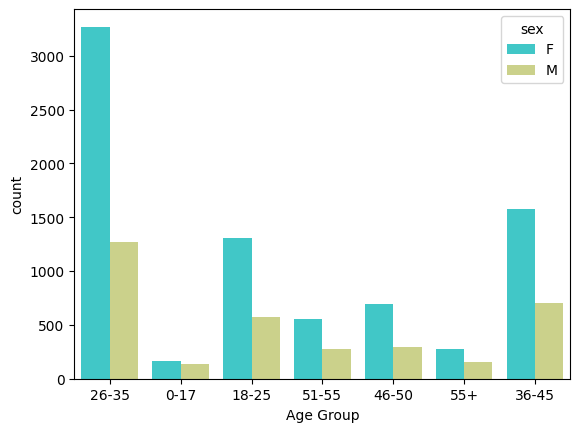

In [56]:
sns.countplot(x='Age Group',data=df,palette='rainbow' , hue= 'sex')


/tmp/ipython-input-403797003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Amount', data=age, palette='rainbow')


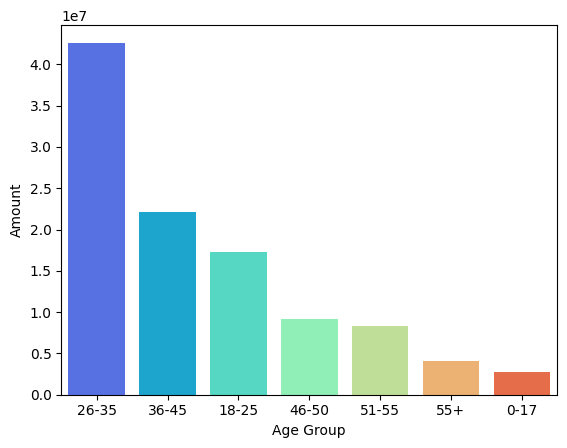

In [57]:
#total amount to the total age group
age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=age, palette='rainbow')
plt.show()

*from the above buyers we can see that most of the buyrs are from age between 26-35 yrs female*

# state

In [59]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

/tmp/ipython-input-1842075415.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='State',y='Orders',palette='rainbow')


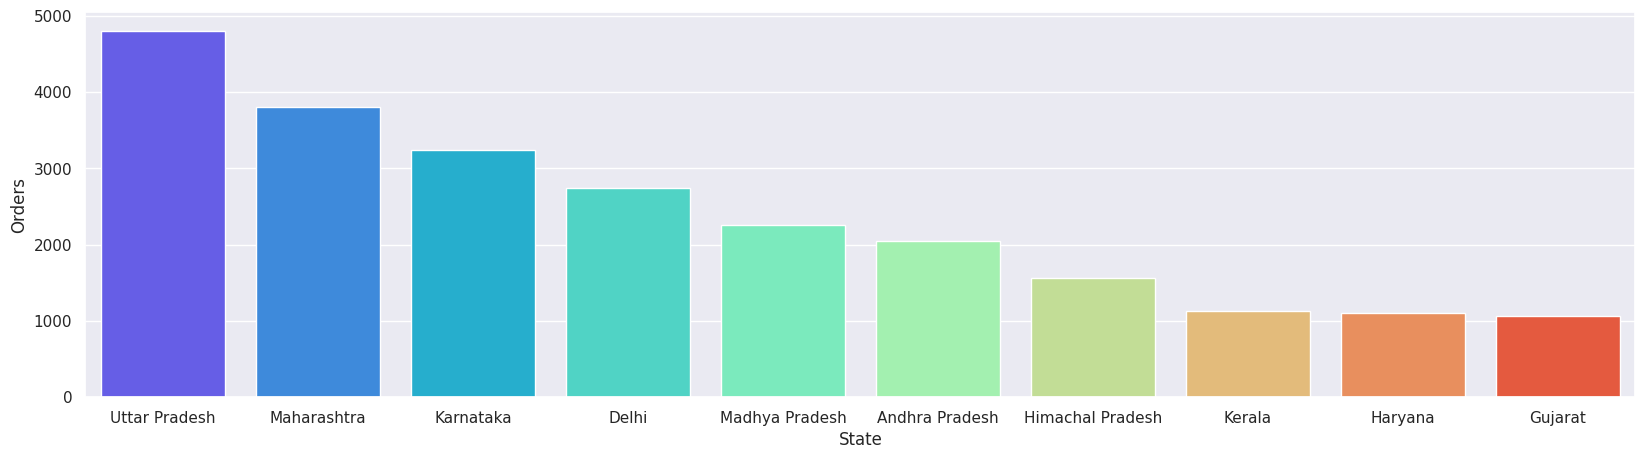

In [66]:
# total numbers of orders from top 10 states

sales_state  =df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='State',y='Orders',palette='rainbow')
plt.show()

/tmp/ipython-input-2874365322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='State',y='Amount',palette='rainbow')


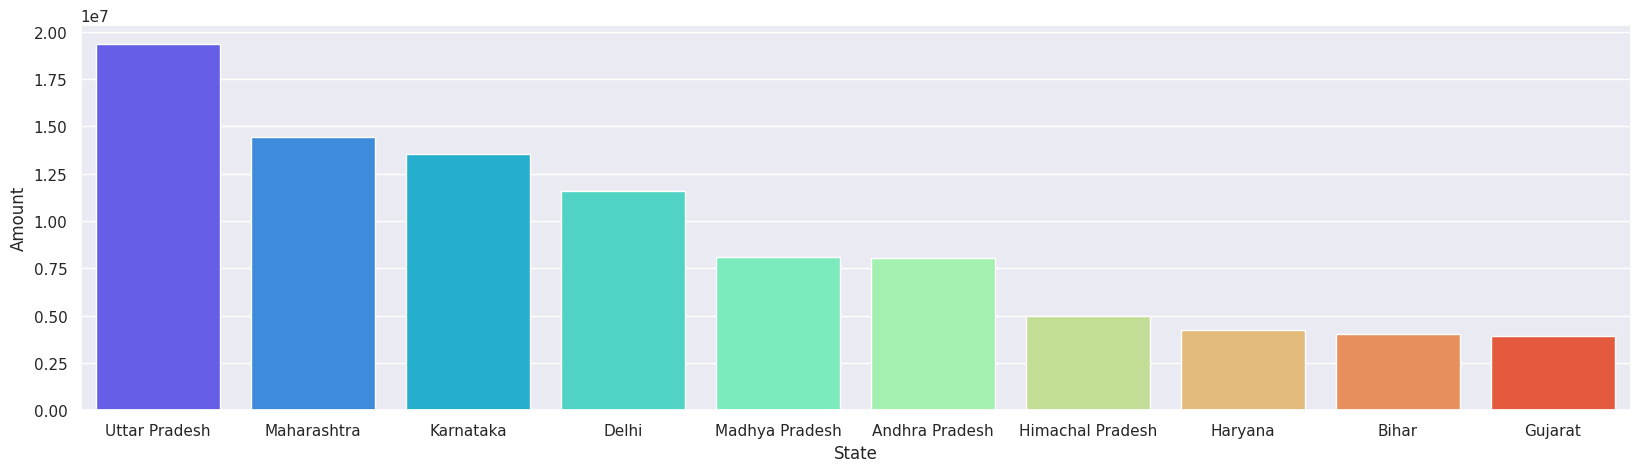

In [67]:
# total amount / sales from top 10 states
sales_state  =df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='State',y='Amount',palette='rainbow')
plt.show()

*from the above data analyzie we can see that most of the orders from uttar pradesh , maharashtra and karanataka resepctively*

martial status

/tmp/ipython-input-149474772.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  shaadi = sns.countplot(x='Marital_Status',data=df,palette='rainbow')


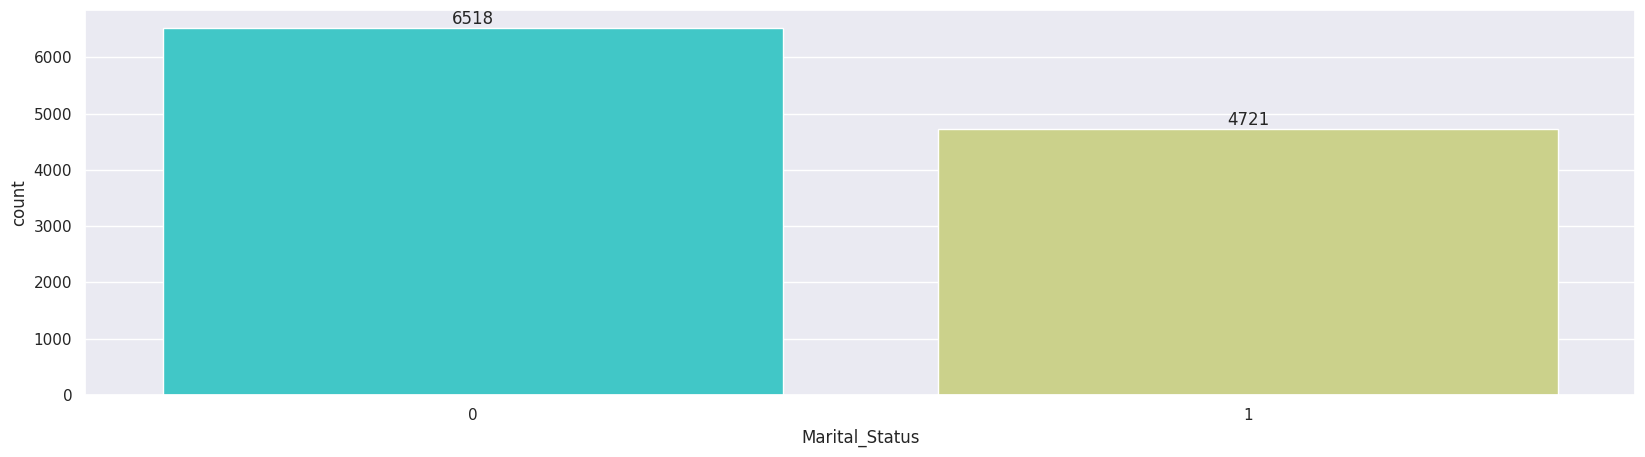

In [71]:
shaadi = sns.countplot(x='Marital_Status',data=df,palette='rainbow')
sns.set(rc={'figure.figsize':(7,5)})
for bars in shaadi.containers:
  shaadi.bar_label(bars)

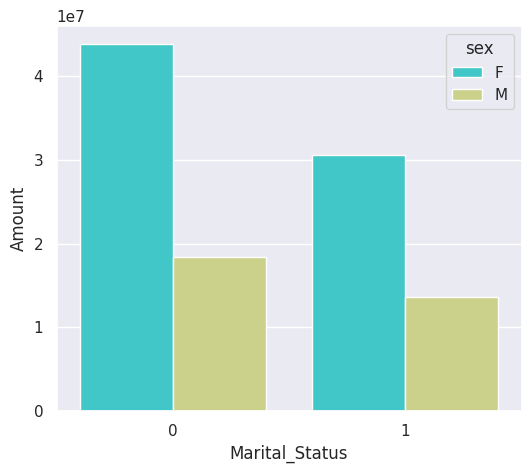

In [72]:
sales_state  =df.groupby(['Marital_Status','sex'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='sex',palette='rainbow')
plt.show()

from the above graph we can see that most of the buyers are married women and thet have high purchasing power

# occupation

In [73]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

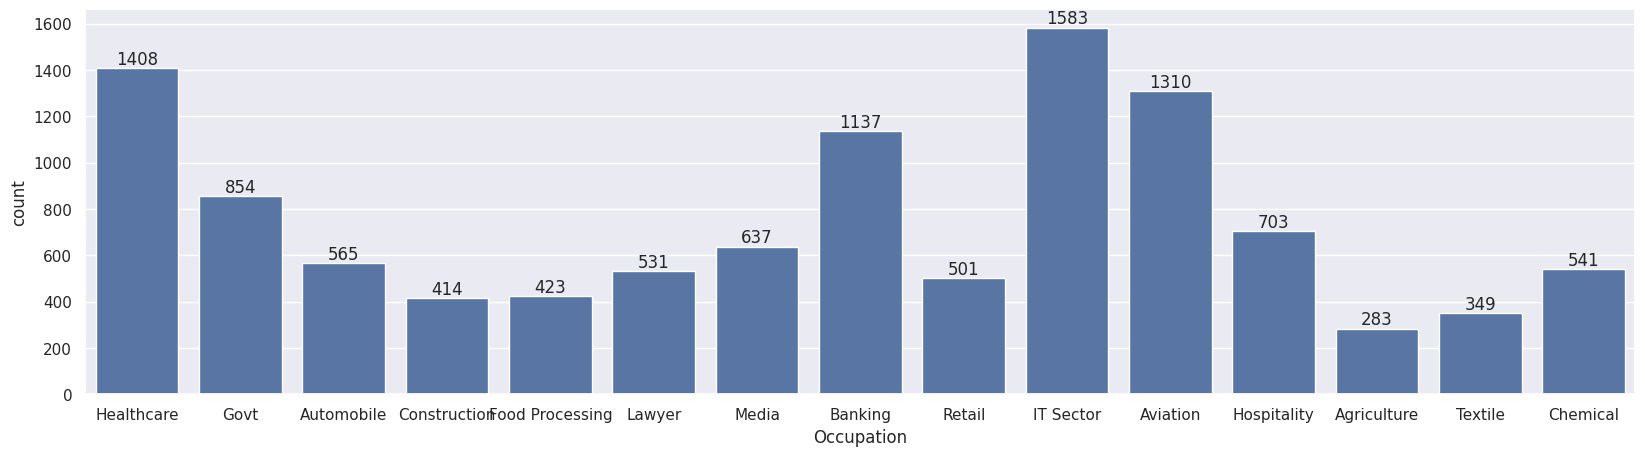

In [74]:
sns.set(rc={'figure.figsize':(20,5)})
occupation=sns.countplot(data=df,x='Occupation')
for bars in occupation.containers:
  occupation.bar_label(bars)

/tmp/ipython-input-2868554673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='Occupation',y='Amount',palette='rainbow')


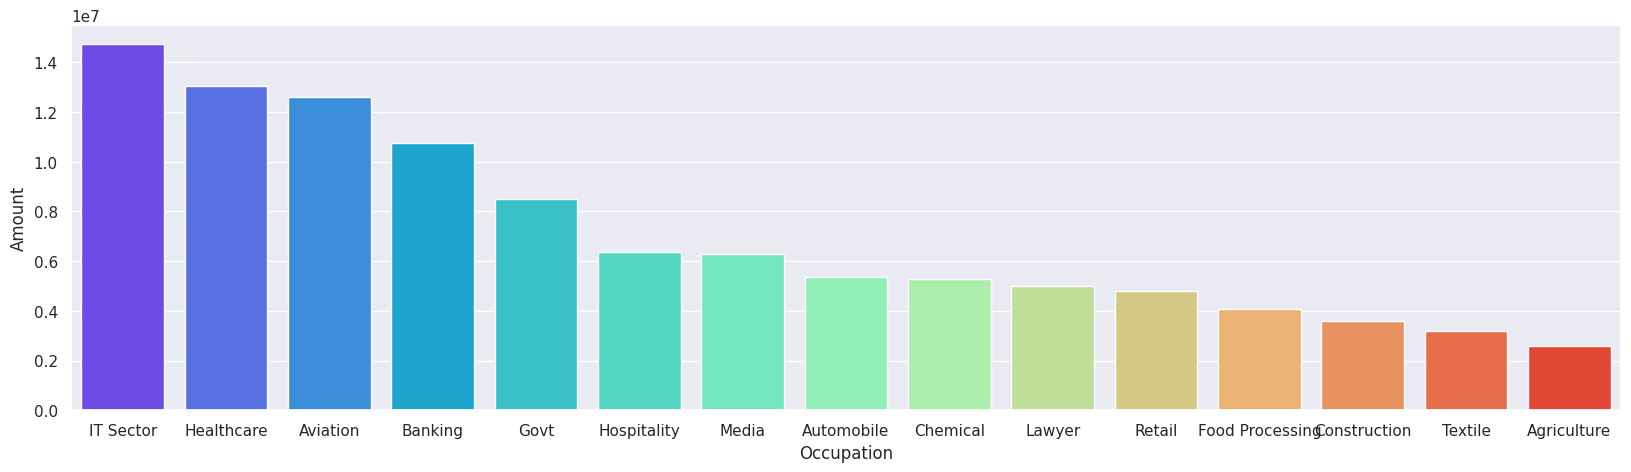

In [77]:
# w want to see the purchasing power among all the occupation
sales_state  =df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount',palette='rainbow')
plt.show()

*from this we can we can see that most of the buyers are from IT , aviation and healthcare sector*

In [78]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'sex', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# product

/tmp/ipython-input-2078898135.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='Product_Category',y='Amount',palette='rainbow')


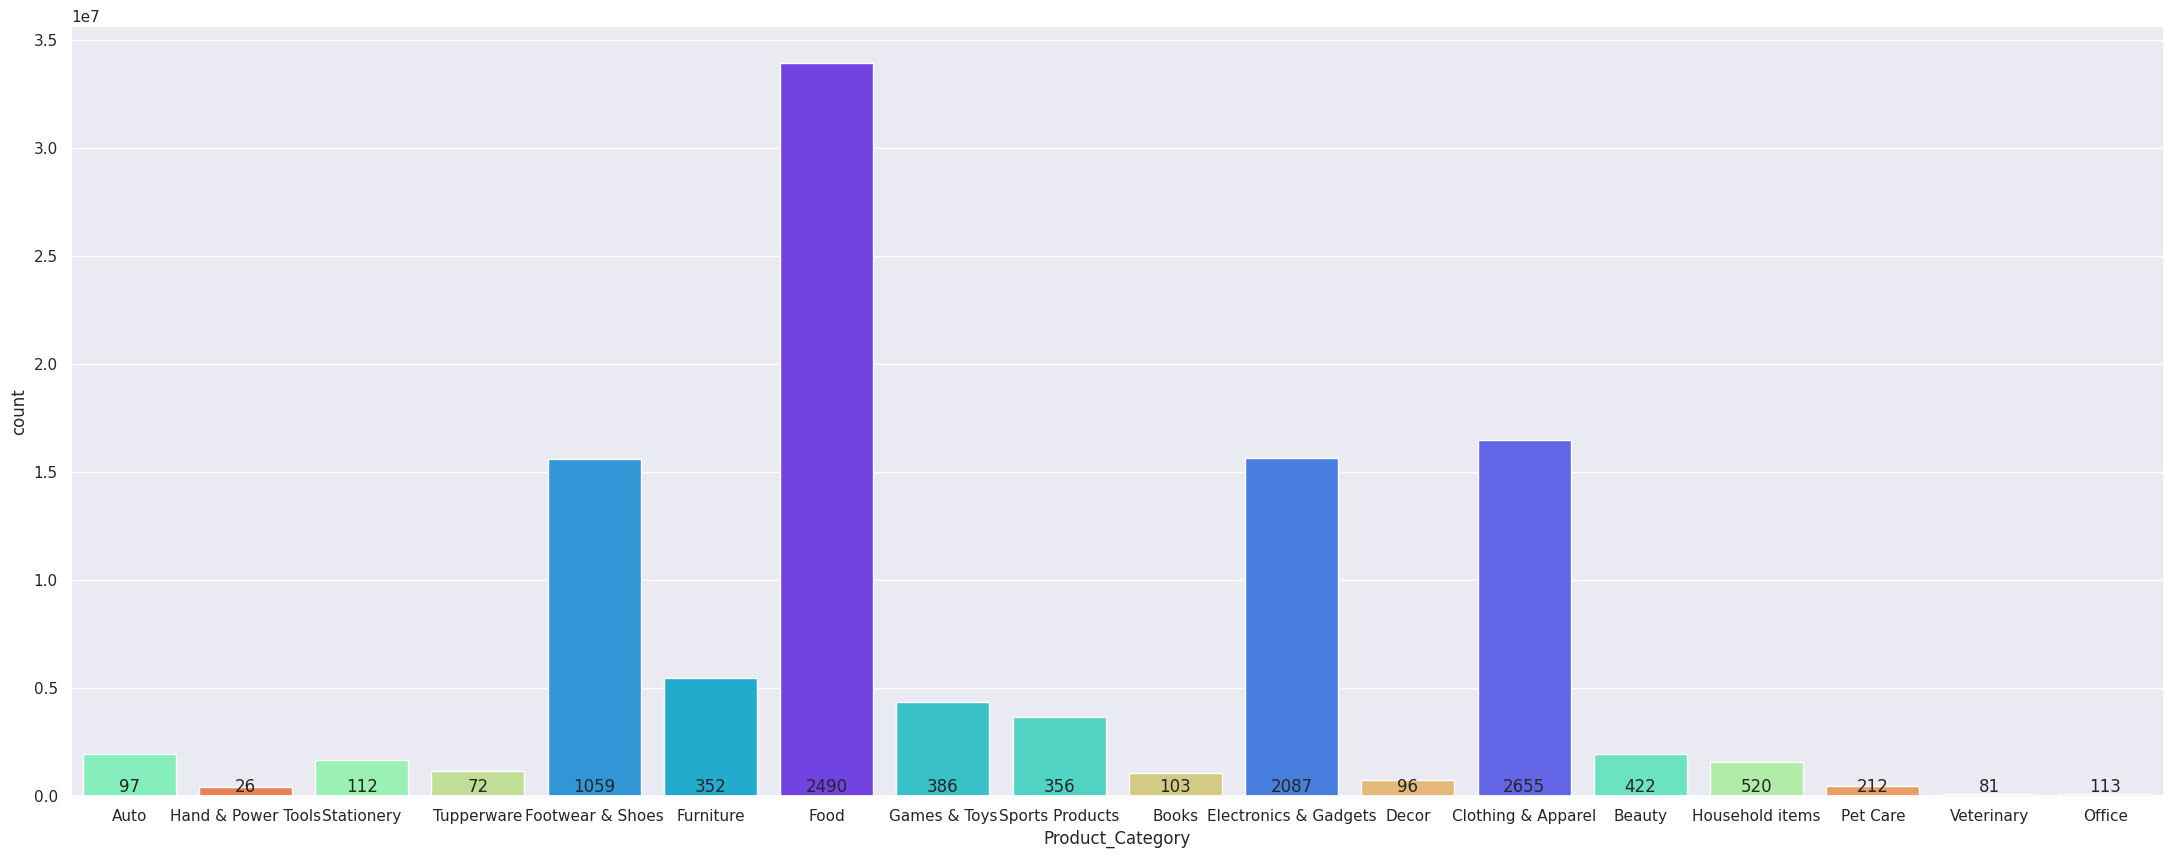

In [93]:
sns.set(rc={'figure.figsize':(27,10)})
product=sns.countplot(data=df,x='Product_Category')
for bars in product.containers:
  product.bar_label(bars)


sales_state  =df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(27,10)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount',palette='rainbow')
plt.show()


/tmp/ipython-input-882781825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='Product_Category',y='Amount',palette='rainbow')


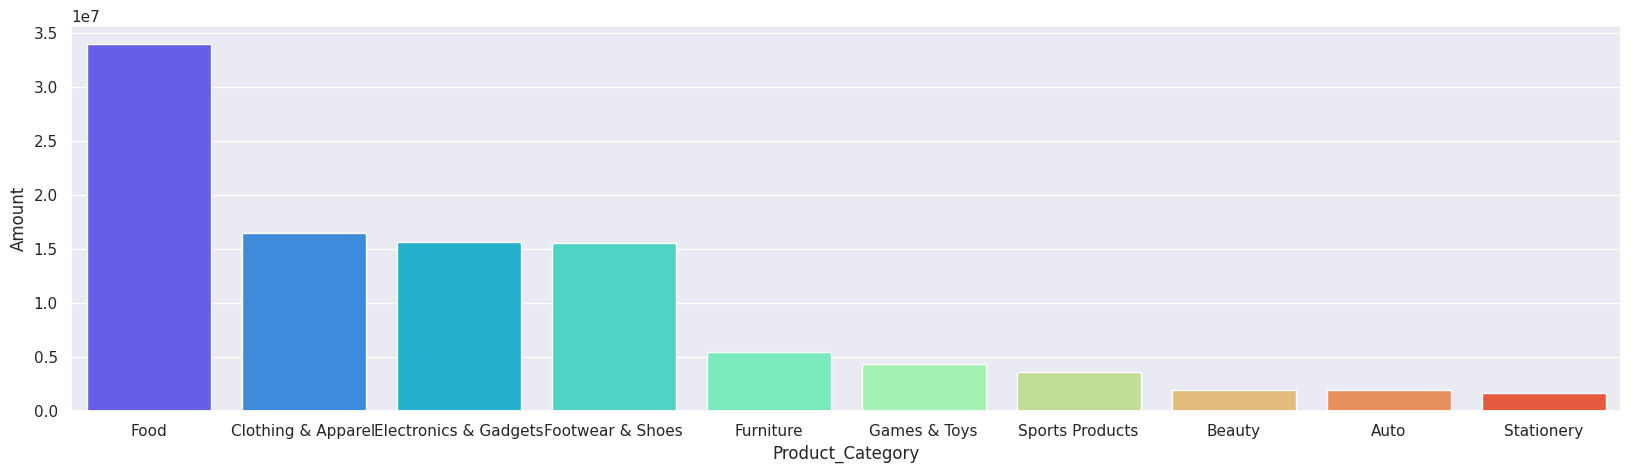

In [94]:
sales_state=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount',palette='rainbow')
plt.show()

*from this is we can see that most of the sold product are from food , footware and electronics category*

/tmp/ipython-input-1635848274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state,x='Product_ID',y='Orders',palette='rainbow')


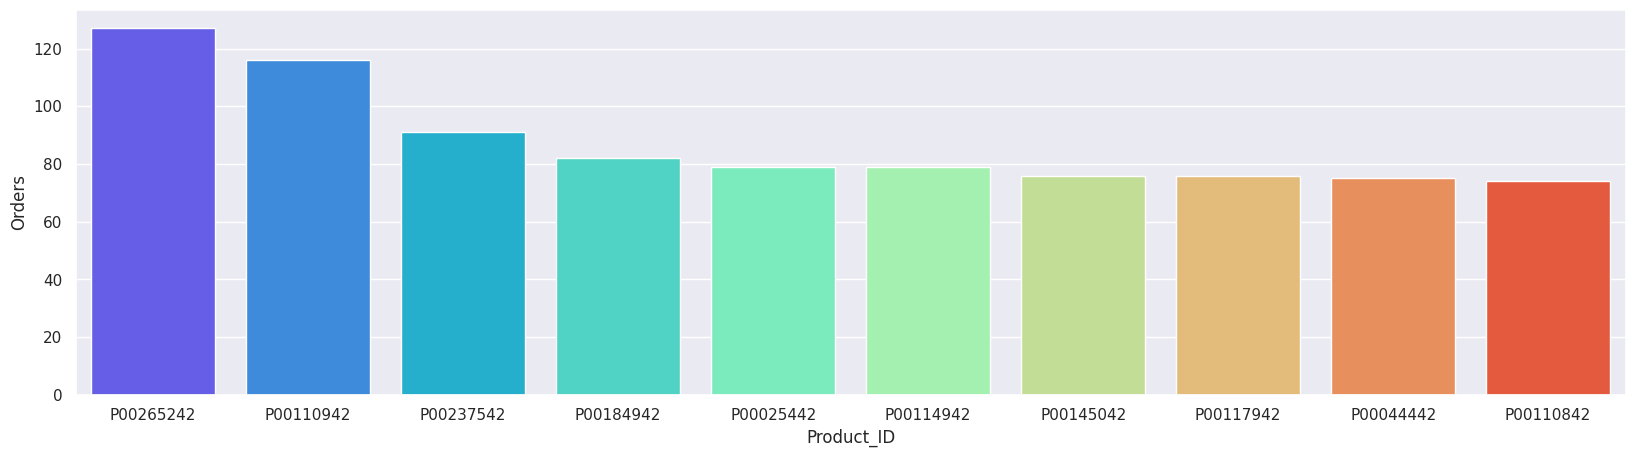

In [95]:
sales_state=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders',palette='rainbow')
plt.show()

<Axes: xlabel='Product_ID'>

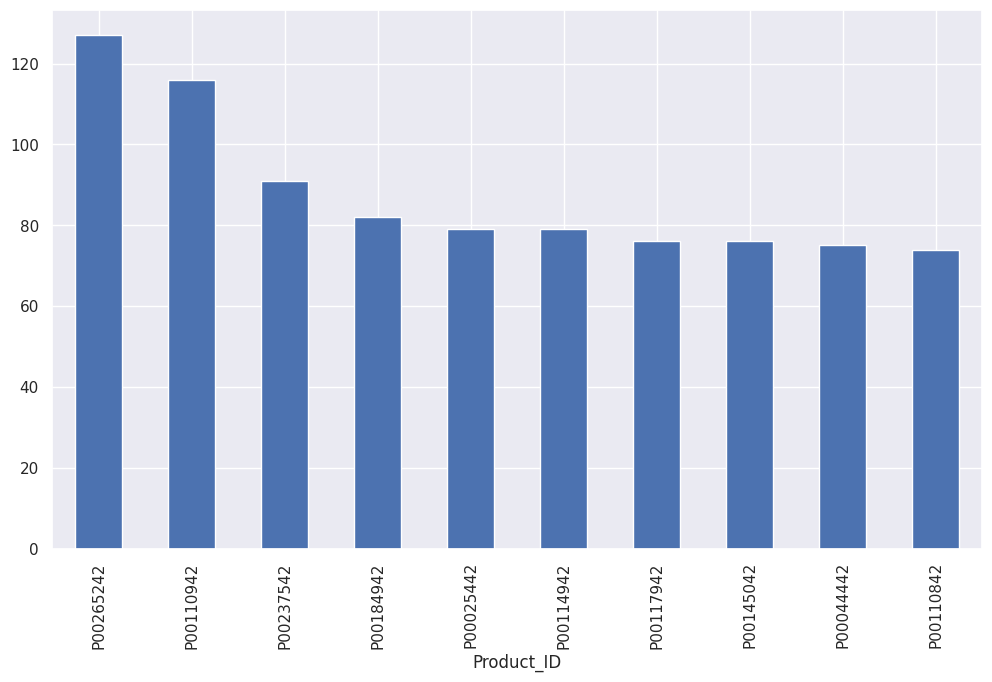

In [96]:
# top 10 most sold product
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

**CONCLUSION:**
*MARRIED WOMEN AGE GROUP NEAR 26-35 YRS FROM UTTAR PRADESH , MAHARASHTRA AND KARNATAKA WORKING IN (IT-SECTOR , HEALTHCARE , AND ACTIVATION ) ARE MORE LIKELY BUY PRODUCTS FROM (CLOTHING, FOOD AND ELECTRONICS CATEGORY) LIKELY MOST BUYED PRODUCT THE PRODUCT ID IS P00265242 FROM LARGEST ORDER ETC*

**Project Learnings**

--Performed data cleaning and manipulation

--Performed exploratory data analysis (EDA) using pandas, matplotlib and seaborn libraries

--Improved customer experience by identifying potential customers across different states, occupation, gender and age groups

--Improved sales by identifying most selling product categories and products, which can help to plan inventory and hence meet the demands